In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
#df = pd.read_csv(r'C:\Users\alexf\Downloads\movies.csv')
df = pd.read_csv('movies.csv')

In [70]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [35]:
#Data cleanup AND Change datatype of columns
# Handling non-integer values and converting to 'float64'
df['budget'] = pd.to_numeric(df['budget'], errors='coerce') # converts values to numeric, replacing non-numeric values with NaN.
# Handling missing values and converting to 'int64'
df['budget'] = df['budget'].fillna(df['budget'].mean()).astype('int64') #eplaces NaN values with 0 and convert

#Do the same for gross
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['gross'] = df['gross'].fillna(df['gross'].mean()).astype('int64') 

#Handle column rating, type in string
# Specify the value to fill the blanks
fill_value = 'Not Rated'

# Fill blanks in the 'column_name' column with the specified value
df['rating'] = df['rating'].fillna(fill_value)

#Now all data is ready

In [6]:
# Change datatype of column
#df['budget'] = df['budget'].astype('int64')

In [36]:
# Create correct year column, extact the year
#df['yearcorrect'] = df['released'].astype('str').split(',').str[1].str[:4]
df['yearcorrect'] = df['released'].astype(str).str.split(',').str[1].str[:5]

<Axes: >

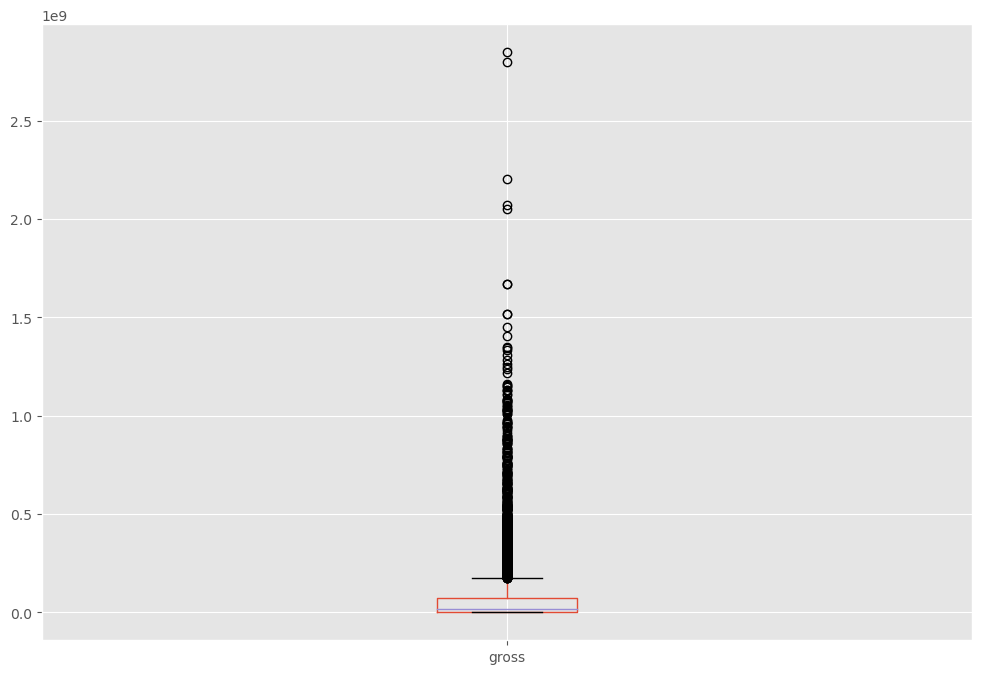

In [37]:
# Are there any Outliers?
df.boxplot(column=['gross'])

In [38]:
df.drop_duplicates()
# Now ready to go

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,No data,90.0,2020
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,No data,120.0,2020


In [39]:
# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,Not Rated,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [71]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


Text(0.5, 1.0, 'Budget vs Gross Earning')

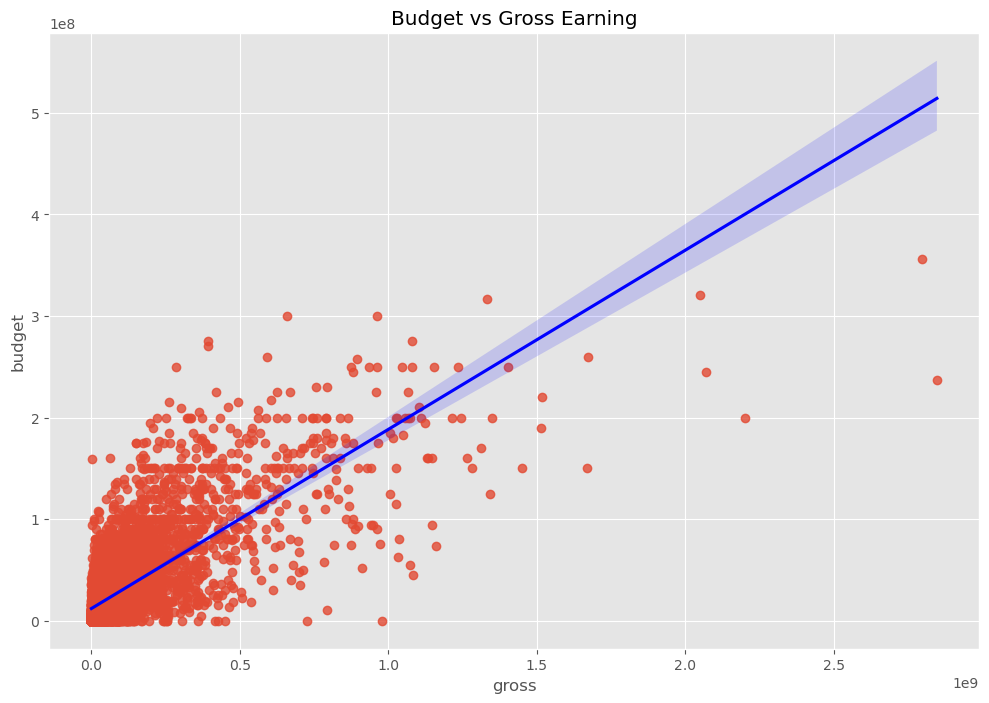

In [41]:
sns.regplot(x="gross", y="budget", data=df, line_kws = {'color':'blue'})
plt.title('Budget vs Gross Earning')
#plt.show()

Text(0.5, 1.0, 'Score vs Gross Earning')

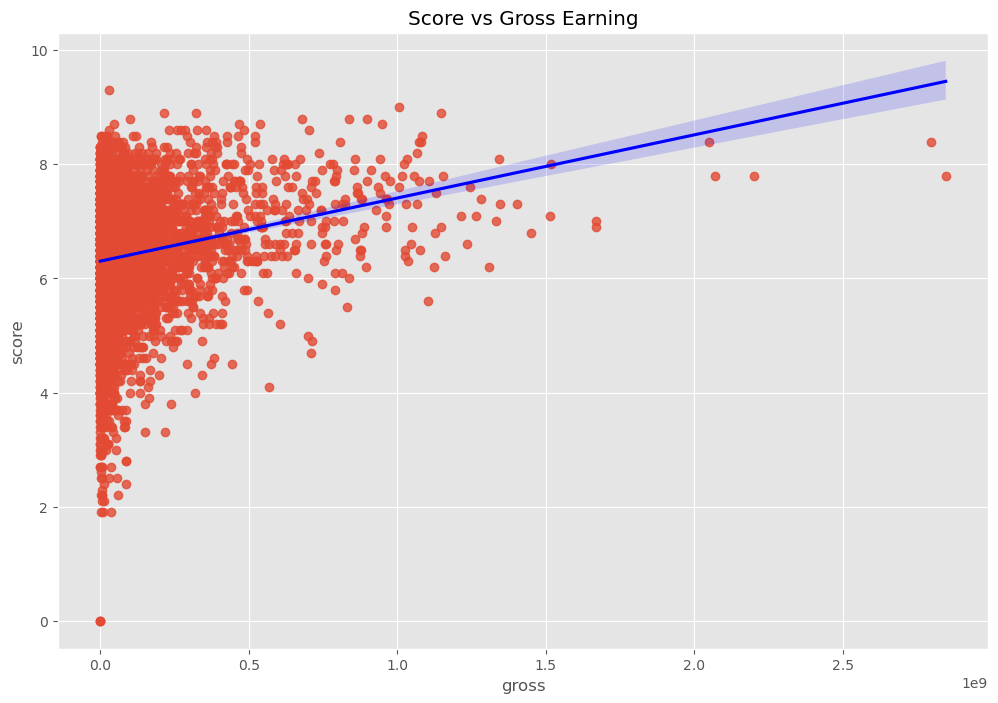

In [53]:
sns.regplot(x="gross", y="score", data=df, line_kws = {'color':'blue'})
plt.title('Score vs Gross Earning')

Text(0.5, 1.0, 'Votes vs Gross Earning')

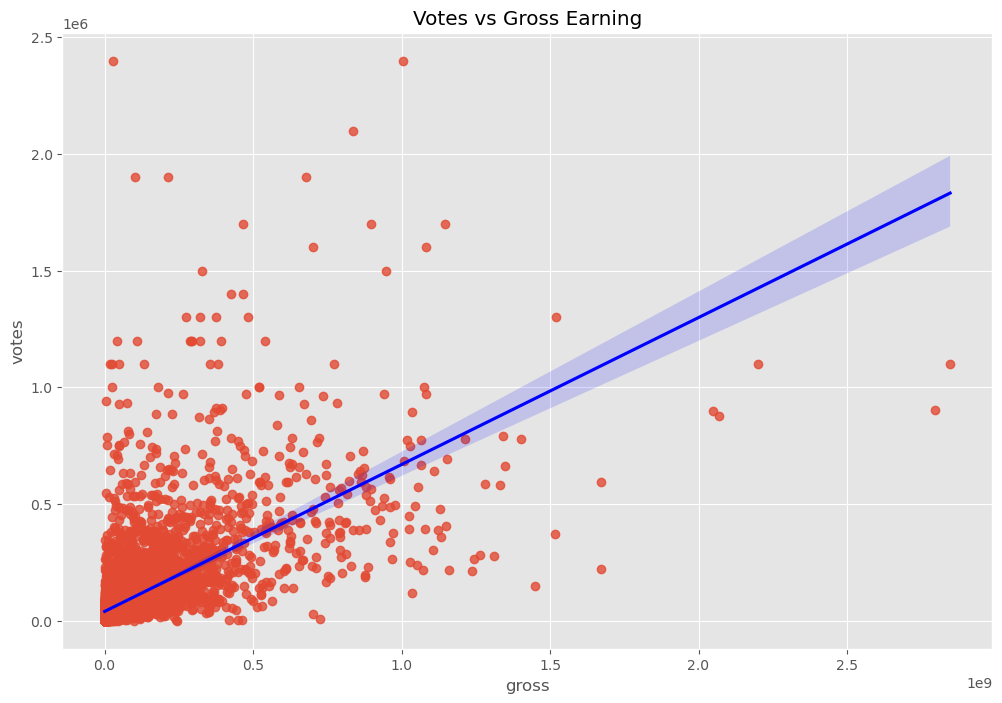

In [54]:
sns.regplot(x="gross", y="votes", data=df, line_kws = {'color':'blue'})
plt.title('Votes vs Gross Earning')

In [ ]:
# Correlation Matrix between all numeric columns

In [55]:
#df.corr(method ='pearson')
# Check for missing values in the DataFrame
print(df.isnull().sum())

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
dtype: int64


In [44]:
# Fill in blanks
# Specify the value to fill the blanks

# Object
fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['released'] = df['released'].fillna(fill_value)

fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['writer'] = df['writer'].fillna(fill_value)

fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['star'] = df['star'].fillna(fill_value)

fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['country'] = df['country'].fillna(fill_value)

fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['company'] = df['company'].fillna(fill_value)

fill_value = 'No data'
# Fill blanks in the 'column_name' column with the specified value
df['yearcorrect'] = df['yearcorrect'].fillna(fill_value)


# Numerical
# Handling non-integer values and converting to 'float64'
df['score'] = pd.to_numeric(df['score'], errors='coerce') # converts values to numeric, replacing non-numeric values with NaN.
# Handling missing values and converting to 'int64'
df['score'] = df['score'].fillna(df['score'].mean()) #.astype('int64') #eplaces NaN values with 0 and convert

# Handling non-integer values and converting to 'float64'
df['votes'] = pd.to_numeric(df['votes'], errors='coerce') # converts values to numeric, replacing non-numeric values with NaN.
# Handling missing values and converting to 'int64'
df['votes'] = df['votes'].fillna(df['votes'].mean()) #.astype('int64') #eplaces NaN values with 0 and convert

# Handling non-integer values and converting to 'float64'
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce') # converts values to numeric, replacing non-numeric values with NaN.
# Handling missing values and converting to 'int64'
df['runtime'] = df['runtime'].fillna(df['runtime'].mean()) #.astype('int64') #eplaces NaN values with 0 and convert

In [60]:
# Correlation Matrix between all numeric columns

#df.corr() note: only work with numeric value
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])
# Calculate correlation for numeric columns
print(numeric_columns.corr(method ='pearson'))
#print(numeric_columns.corr(method ='kendall'))
#print(numeric_columns.corr(method ='spearman'))

             year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.120766
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.395549
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.309114
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.269485
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.245223
runtime  0.120766  0.395549  0.309114  0.269485  0.245223  1.000000


Text(120.72222222222221, 0.5, 'Movie features')

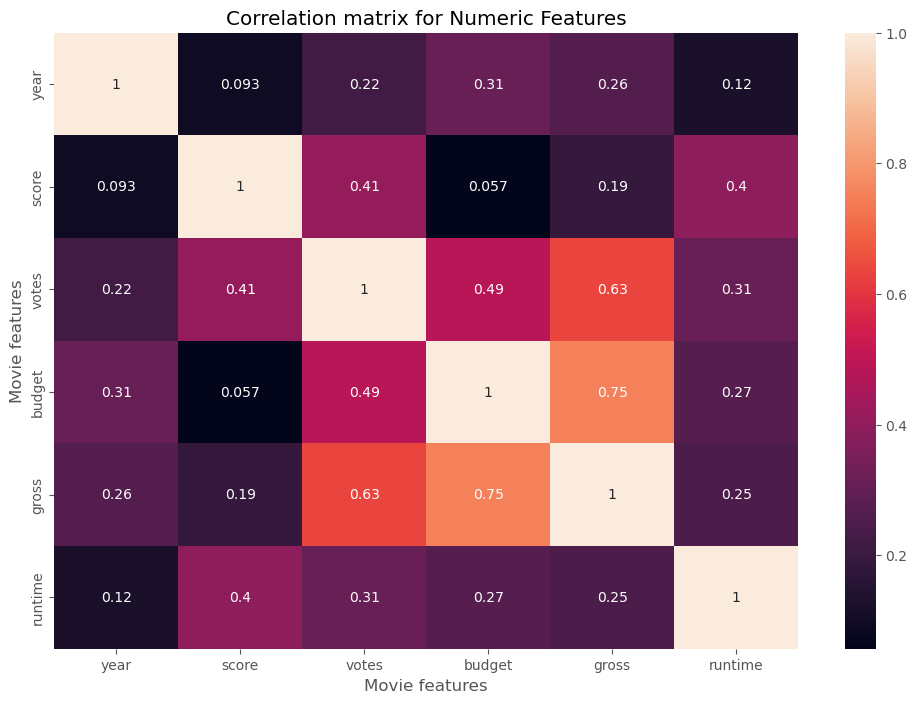

In [62]:
correlation_matrix = numeric_columns.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

In [63]:
# Convert categorical (object) columns in a DataFrame (df) into numerical representations using Pandas' categorical codes

# df_numerized = df
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146.000000,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.000000,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.000000,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88.000000,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1778,98.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,3,6,2020,2965,3.1,18.0,1500,2289,2422,56,7000,0,1737,90.000000,40
7664,1678,3,4,2020,1107,4.7,36.0,774,2614,1886,56,0,0,539,90.000000,40
7665,4717,3,6,2020,193,5.7,29.0,2061,2683,2041,56,58750,0,941,107.261613,40
7666,2843,3,6,2020,2818,0.0,0.0,1184,1824,450,56,15000,0,1737,120.000000,40


In [72]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


Text(120.72222222222221, 0.5, 'Movie features')

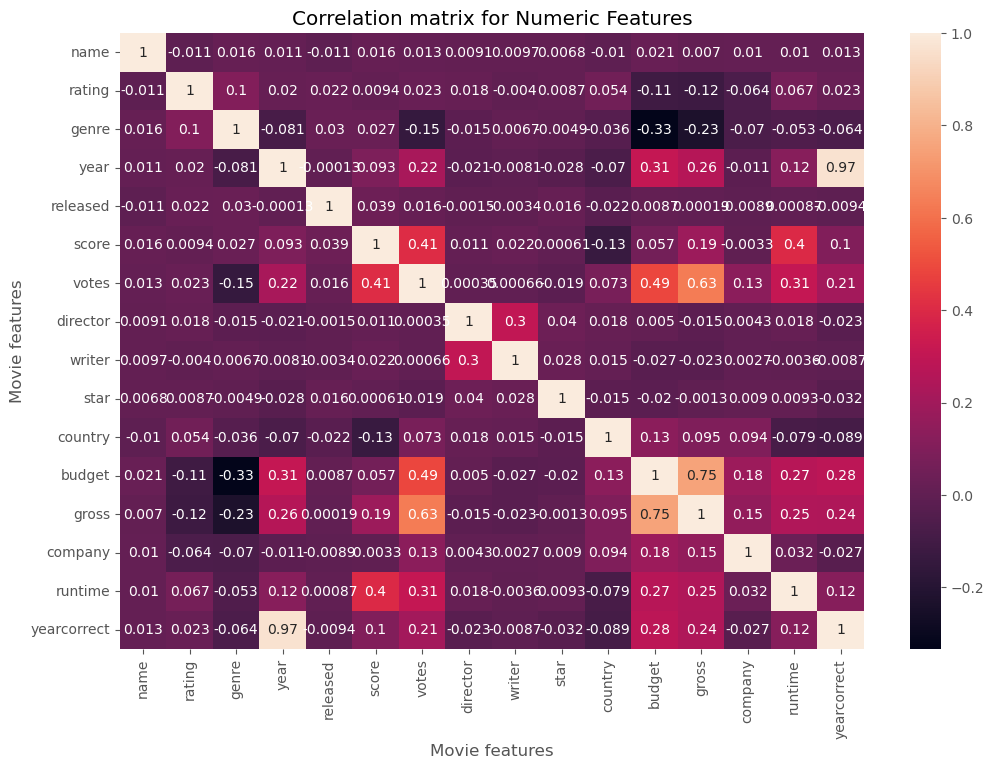

In [65]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

In [67]:
correlation_mat = df_numerized.corr().copy()
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating        -0.010860
             genre          0.016355
             year           0.011453
             released      -0.010703
                              ...   
yearcorrect  budget         0.284783
             gross          0.243478
             company       -0.026872
             runtime        0.115240
             yearcorrect    1.000000
Length: 256, dtype: float64


In [68]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [69]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.967486
year         yearcorrect    0.967486
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
# Votes and Budget have the highest correlation to gross earnings